In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import pdist, squareform

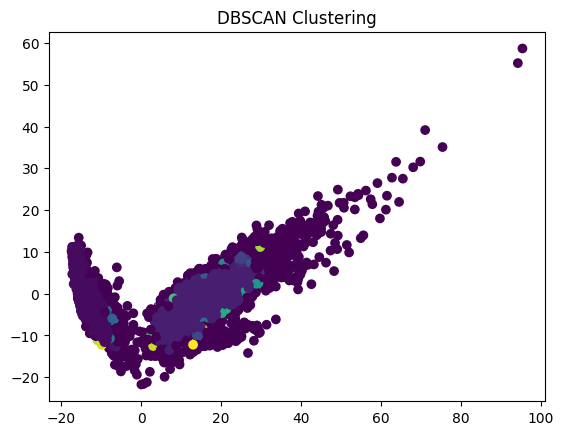

In [6]:
df = pd.read_csv("./input/human-activity-recognition-with-smartphones/train.csv")

# 필요한 변수 선택
features = df.iloc[:, :-2]

# StandardScaler를 이용한 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA를 이용한 차원 축소
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# distance matrix 계산
dist = pdist(pca_features)

# distance matrix를 squareform으로 변환
dist_matrix = squareform(dist)

# DBSCAN 알고리즘 적용
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
labels = dbscan.fit_predict(dist_matrix)

# 클러스터링 결과 시각화
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.show()


데이터셋에서 필요한 변수를 선택
StandardScaler를 이용하여 데이터를 스케일
PCA를 이용하여 2차원으로 차원 축소
pdist 함수를 이용하여 distance matrix를 계산
DBSCAN 알고리즘에 distance matrix를 입력하여 클러스터링을 수행
클러스터링 결과 시각화